<a href="https://colab.research.google.com/github/angelmorenocalvo/taller_TensorFlow/blob/master/celsius_resuelto_normalizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Celsius

En este ejemplo vas ha entrenar tu primer modelo de machine learning.

Para empezar usaremos un ejemplo sencillo, este sera el de convertir de grados Celsius a Fahrenheit:

$f=c*1.8+32$

Si quisiesemos sería muy sencillo el hacer una función en python que hiciese esta tarea, pero esto no seria machine learning :|

Vamos a darle a Tensorflow algunos ejemplos de valore de celsius (0,8,15,22,38) y los correspondientes valores de Fahrenheit (32,46,59,72,100). Despues entrenameros el modelo que debería conseguir la formula de arriba.

## Importar las dependencias
Primero, importaremos TensorFlow. Lo llamaremos **tf** para que sea un uso más facil.
Despues importaremos numpy que nos ayudara a representar nuestros datos como listas con más rendimiento.

In [0]:
import tensorflow as tf
import numpy as np

## Preparando los datos de entrenamiento

Como sabemos el Machine Learning supervisado cuenta con inputs y outputs conocidos, pero no se conoce el algoritmo.

Crearemos dos listas(celsius_q y fahrenheit_a) las que usaremos para entrenar el modelo

In [0]:
celsius_q = np.array([-40, -10,  0,  8, 15, 22,  38], dtype='float').T
fahrenheit_a = 1.8*celsius_q + 32.0

# Imprimimos los datos para verlos por parejas
for i,c in enumerate(celsius_q):
  print("{} grados Celsius = {} grados Fahrenheit".format(c, fahrenheit_a[i]))


-40.0 grados Celsius = -40.0 grados Fahrenheit
-10.0 grados Celsius = 14.0 grados Fahrenheit
0.0 grados Celsius = 32.0 grados Fahrenheit
8.0 grados Celsius = 46.4 grados Fahrenheit
15.0 grados Celsius = 59.0 grados Fahrenheit
22.0 grados Celsius = 71.6 grados Fahrenheit
38.0 grados Celsius = 100.4 grados Fahrenheit


### Escalar entre 0 y 1
Para ello, se fija un mínimo y un máximo por separado en cada variable. Con arreglo a esto, se escalan el resto de valores. Pongamos que  va desde -273ºC hasta 300ºC, y sus correspondientes salidas: -459.4ºF,  572ºF

In [0]:
from sklearn.preprocessing import MinMaxScaler
celsius_scaler = MinMaxScaler().fit([[-273.], [300.]])
celsius_norm = celsius_scaler.transform(celsius_q.reshape(7,1))
fahrenheit_scaler = MinMaxScaler().fit([[-459.4], [572.]])
fahrenheit_norm = farenheit_scaler.transform(fahrenheit_a.reshape(7,1))

In [0]:
celsius_norm, farenheit_norm

(array([[0.40663176],
        [0.45898778],
        [0.47643979],
        [0.4904014 ],
        [0.5026178 ],
        [0.51483421],
        [0.54275742]]), array([[0.40663176],
        [0.45898778],
        [0.47643979],
        [0.4904014 ],
        [0.5026178 ],
        [0.51483421],
        [0.54275742]]))

## Algunas terminologías del Machine Learning

- **Característica** $\rightarrow$ es cada una de las componentes del vector de entrada, en este caso se tratat de un escalar: los grados Celsius

- **Predicción** $\rightarrow$ La salidas del modelo, para cada muestra de entradas, en este ejemplo, los grados Fahrenheit.

- **Muestra** $\rightarrow$ cada uno de los ejemplos que el modelo usa aprender inicialmente y, posterormente, para verificar su funcionamiento. Tanto en el aprendizaje, como en la verificación, es muy común acompañar a cada una de estas entradas de su salida deseada. En nuestro caso una pareja de *celsius_q* y *fahrenheit_a* de un indice dado, ejemplo: (22,72) sería muestra.

## Creando el modelo
Ahora pasaremos a crear el modelo. Usaremos el más simple posible: una sóla capa con sus neurionas distribuidas en una sola dimensión. Normalmente cada neurona se alimenta de todas las entradas disponibles, por eso, a  veces, se la denomina "densa", para distinguirla de otras redes en las que una determinada neurona sólo se alimenta de una cierta parte de las entradas. Por simplificar aún más, en este ejemplo, la capa estará consituida por una neurona.

### Creacion de una capa
Llamaremos capa `l0` a la capa que utilizaremos, y se instanciará a traves de `tf.keras.layers.Dense`con la siguiente configuración:
- `input_shape=[1]` $\rightarrow$ esto especifica que cada muestra es un escalar. El atributo "shape" es para indicar que es un array, en este caso, de una dimensión con un elemento, puesto que se trata de grados Celsius.

- `units=1` $\rightarrow$  este especifica el numero de neuronas en la capa. 
Como esta es la capa final es tambien el tamaño de output del modelo, un solo valor flotante representado en grados Fahrenheit.
(En una red multicapa el tamaño del shape  de la capa debe coincidir con el `input_shape` de la siguiente capa.)



In [0]:
l0 = tf.keras.layers.Dense(units = 1, input_shape = [1])

## Montar las capas en el modelo

Una vez las capas son definidas, éstas deben montarse en el modelo. Al ser de tipo "Sequential" se define a través de una lista con las capas como argumentos, especificando el orden de input a output.

Este modelo tiene una unica capa:

In [0]:
model = tf.keras.Sequential([l0])

**Se puede crear las capas al mismo tiempo que se meten en el modelo:**

In [0]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1,input_shape=[1])
])

## Compilar el modelo con las funciones de perdida y optimización.

Antes de entrenar el modelo debe ser compilado. Cuando se compila un modelo se le tiene que dar:
- Función de coste (loss) $\rightarrow$  es la usada por el algoritmo de aprendizaje para su optimización en un proceso iterativo, por el que se van procesando las diferentes muestras
- Optimizador $\rightarrow$ definida la función de coste/pérdida, existen varias alternativas optimizarla. A través de este parámetro se especifica la manera concreta de alcanzar este óptimo.

In [0]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

La optimización  del error cuadrático medio, en este caso, se realizará por el método de Adam. En la Estadística básica, si se tratase de una regresión lineal, existen alternativas como el método de mínimos cuadrados. No es importante, por el momento, conocer cómo funcionan estos optimizadores, pero sí, si precisan de algún parámetro. Aunque se suelen venir con un valor por defecto, se le puede dar directamente, como en este caso, el llamado el factor de aprendizaje (learning rate): 0.1. Marcará la magnitud de las variaciones que ajustan los parámetros del modelo. Si se conociese un poco más a fondo el algoritmo de Adam, se vería que hay una situación de compromiso para escoger un factor de aprendizaje ni muy grande, ni muy pequeño. Y, a pesar de no ser un método muy científico, en la práctica el ensayo-error es una de las maneras más comunes de ajustar este valor.

Se suelen utilizar en un rango entre 0.001 y 0.1.

## Entrenando el modelo
Esto se lleva a cabo mediante el llamando metodo `fit`.

Durante el entrenamiento, el modelo toma los valores en Celsius, realizando el calculo usando los valores internos de las variables(llamados pesos) y los valores de salida(grados Fahrenheit).

Los valores internos de los pesos son inicializados aleatoriamente en una rango (-1,1), y en las siguientes iteraciones, se van variando con el fin de aproximarse al óptimo de la función de coste.

El ciclo de calcular, comparar es controlado por el metodo `fit`. Argumentos:
1. Inputs.
2. Outputs.
3. `epoch` número de veces que pasará por toda la colección de muestras que conforman el experimento.
4. `verbose` igual a un entero que marca el modo de salida de resultados a medida que se ejecuta el algoritmo. El modo "silencioso" sería el 0. El siguiente en sacar más información durante el aprendizaje, sería el 1 y así sucesivamente. Ver documentación. 

Obsérvese que el método 'fit' devuelve los resultados en un objeto denominado 'history'. Tiene muchos atributos. Con ellos, se puede obtener, con un nivel de detalle bastante grande, los resultados parciales de la evolución del aprendizaje. Cuando no se obtiene los resultados deseados o se observan errores, es una de las fuentes más útiles para la búsqueda de soluciones. Consultar documentación adicional.

In [0]:
history = model.fit(x=celsius_norm, y=farenheit_norm, epochs=500, verbose=1)
print("entrenamiento terminado")


Train on 7 samples
Epoch 1/500
7/7 [==============================] - 0s 43ms/sample - loss: 0.0581
Epoch 2/500
7/7 [==============================] - 0s 158us/sample - loss: 0.0087
Epoch 3/500
7/7 [==============================] - 0s 159us/sample - loss: 0.0018
Epoch 4/500
7/7 [==============================] - 0s 165us/sample - loss: 0.0163
Epoch 5/500
7/7 [==============================] - 0s 153us/sample - loss: 0.0235
Epoch 6/500
7/7 [==============================] - 0s 157us/sample - loss: 0.0182
Epoch 7/500
7/7 [==============================] - 0s 135us/sample - loss: 0.0083
Epoch 8/500
7/7 [==============================] - 0s 170us/sample - loss: 0.0014
Epoch 9/500
7/7 [==============================] - 0s 181us/sample - loss: 6.5239e-04
Epoch 10/500
7/7 [==============================] - 0s 135us/sample - loss: 0.0047
Epoch 11/500
7/7 [==============================] - 0s 123us/sample - loss: 0.0090
Epoch 12/500
7/7 [==============================] - 0s 222us/sample - loss

Epoch 97/500
7/7 [==============================] - 0s 398us/sample - loss: 9.4050e-05
Epoch 98/500
7/7 [==============================] - 0s 134us/sample - loss: 9.3572e-05
Epoch 99/500
7/7 [==============================] - 0s 189us/sample - loss: 9.2056e-05
Epoch 100/500
7/7 [==============================] - 0s 352us/sample - loss: 9.0223e-05
Epoch 101/500
7/7 [==============================] - 0s 117us/sample - loss: 8.9050e-05
Epoch 102/500
7/7 [==============================] - 0s 223us/sample - loss: 8.8583e-05
Epoch 103/500
7/7 [==============================] - 0s 126us/sample - loss: 8.8042e-05
Epoch 104/500
7/7 [==============================] - 0s 114us/sample - loss: 8.6885e-05
Epoch 105/500
7/7 [==============================] - 0s 148us/sample - loss: 8.5411e-05
Epoch 106/500
7/7 [==============================] - 0s 122us/sample - loss: 8.4255e-05
Epoch 107/500
7/7 [==============================] - 0s 115us/sample - loss: 8.3572e-05
Epoch 108/500
7/7 [================

Epoch 191/500
7/7 [==============================] - 0s 187us/sample - loss: 2.6790e-05
Epoch 192/500
7/7 [==============================] - 0s 143us/sample - loss: 2.6373e-05
Epoch 193/500
7/7 [==============================] - 0s 152us/sample - loss: 2.5961e-05
Epoch 194/500
7/7 [==============================] - 0s 129us/sample - loss: 2.5554e-05
Epoch 195/500
7/7 [==============================] - 0s 290us/sample - loss: 2.5152e-05
Epoch 196/500
7/7 [==============================] - 0s 206us/sample - loss: 2.4756e-05
Epoch 197/500
7/7 [==============================] - 0s 142us/sample - loss: 2.4364e-05
Epoch 198/500
7/7 [==============================] - 0s 138us/sample - loss: 2.3978e-05
Epoch 199/500
7/7 [==============================] - 0s 653us/sample - loss: 2.3596e-05
Epoch 200/500
7/7 [==============================] - 0s 162us/sample - loss: 2.3220e-05
Epoch 201/500
7/7 [==============================] - 0s 456us/sample - loss: 2.2848e-05
Epoch 202/500
7/7 [=============

Epoch 285/500
7/7 [==============================] - 0s 202us/sample - loss: 4.9760e-06
Epoch 286/500
7/7 [==============================] - 0s 249us/sample - loss: 4.8769e-06
Epoch 287/500
7/7 [==============================] - 0s 132us/sample - loss: 4.7797e-06
Epoch 288/500
7/7 [==============================] - 0s 254us/sample - loss: 4.6840e-06
Epoch 289/500
7/7 [==============================] - 0s 140us/sample - loss: 4.5902e-06
Epoch 290/500
7/7 [==============================] - 0s 131us/sample - loss: 4.4980e-06
Epoch 291/500
7/7 [==============================] - 0s 163us/sample - loss: 4.4075e-06
Epoch 292/500
7/7 [==============================] - 0s 165us/sample - loss: 4.3186e-06
Epoch 293/500
7/7 [==============================] - 0s 169us/sample - loss: 4.2313e-06
Epoch 294/500
7/7 [==============================] - 0s 159us/sample - loss: 4.1456e-06
Epoch 295/500
7/7 [==============================] - 0s 214us/sample - loss: 4.0614e-06
Epoch 296/500
7/7 [=============

Epoch 379/500
7/7 [==============================] - 0s 133us/sample - loss: 6.1793e-07
Epoch 380/500
7/7 [==============================] - 0s 117us/sample - loss: 6.0307e-07
Epoch 381/500
7/7 [==============================] - 0s 174us/sample - loss: 5.8858e-07
Epoch 382/500
7/7 [==============================] - 0s 145us/sample - loss: 5.7437e-07
Epoch 383/500
7/7 [==============================] - 0s 159us/sample - loss: 5.6052e-07
Epoch 384/500
7/7 [==============================] - 0s 173us/sample - loss: 5.4698e-07
Epoch 385/500
7/7 [==============================] - 0s 319us/sample - loss: 5.3375e-07
Epoch 386/500
7/7 [==============================] - 0s 149us/sample - loss: 5.2075e-07
Epoch 387/500
7/7 [==============================] - 0s 193us/sample - loss: 5.0812e-07
Epoch 388/500
7/7 [==============================] - 0s 140us/sample - loss: 4.9576e-07
Epoch 389/500
7/7 [==============================] - 0s 108us/sample - loss: 4.8362e-07
Epoch 390/500
7/7 [=============

7/7 [==============================] - 0s 206us/sample - loss: 5.3329e-08
Epoch 473/500
7/7 [==============================] - 0s 207us/sample - loss: 5.1827e-08
Epoch 474/500
7/7 [==============================] - 0s 173us/sample - loss: 5.0371e-08
Epoch 475/500
7/7 [==============================] - 0s 158us/sample - loss: 4.8960e-08
Epoch 476/500
7/7 [==============================] - 0s 233us/sample - loss: 4.7572e-08
Epoch 477/500
7/7 [==============================] - 0s 139us/sample - loss: 4.6239e-08
Epoch 478/500
7/7 [==============================] - 0s 154us/sample - loss: 4.4936e-08
Epoch 479/500
7/7 [==============================] - 0s 133us/sample - loss: 4.3654e-08
Epoch 480/500
7/7 [==============================] - 0s 127us/sample - loss: 4.2417e-08
Epoch 481/500
7/7 [==============================] - 0s 131us/sample - loss: 4.1214e-08
Epoch 482/500
7/7 [==============================] - 0s 357us/sample - loss: 4.0043e-08
Epoch 483/500
7/7 [===========================

## Mostrando los estadísticos
Como se acaba de indicar, con el objeto "history", se puede obtener un histórico más o menos completo. Por ejemplo, se puede ver la evolución de la función de coste durante el aprendizaje.

Usaremos la libreria Matplotlib para visualizarlo.

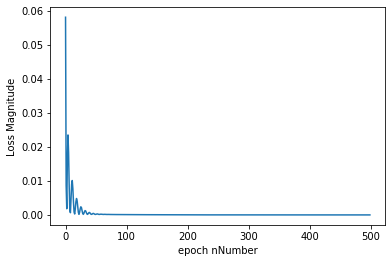

In [0]:
import matplotlib.pyplot as plt
plt.xlabel('epoch nNumber')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])
plt.show()

## Usar el modelo para predecir valores

Ahora que ya temenos el modelo entrenado podemos usarlo para calcular los grados Fahrenheit que corresponderían a una cantidad de gardos Celsius dada. Este consituiría una muestra, que podría haber sido usada en el aprendizaje o no.

Probaremos con 100 grados Celsius.

In [0]:
y_norm = model.predict(celsius_scaler.transform([[100.0]]))
y_predict = fahrenheit_scaler.inverse_transform(y_norm)
print(y_predict)

[[211.3621]]


La respuesta correcta es $100*1.8+32 = 212$ por lo que nuestro modelo lo está haciendo bastante bien.

## Más comprobaciones
[-200, 200] de 10 en 10ºC

In [0]:
x = np.arange(-200, 209, 10).astype(float).reshape(-1,1)
x_norm = celsius_scaler.transform(x)
y_norm = model.predict(x_norm)
y_predict = fahrenheit_scaler.inverse_transform(y_norm)
for i,c in enumerate(x):
    print(c,"ºC =", y_predict[i], "ºF")

[-200.] ºC = [-326.61615] ºF
[-190.] ºC = [-308.68353] ºF
[-180.] ºC = [-290.75092] ºF
[-170.] ºC = [-272.81833] ºF
[-160.] ºC = [-254.88573] ºF
[-150.] ºC = [-236.95311] ºF
[-140.] ºC = [-219.0205] ºF
[-130.] ºC = [-201.08789] ºF
[-120.] ºC = [-183.1553] ºF
[-110.] ºC = [-165.22266] ºF
[-100.] ºC = [-147.29007] ºF
[-90.] ºC = [-129.35745] ºF
[-80.] ºC = [-111.42483] ºF
[-70.] ºC = [-93.49224] ºF
[-60.] ºC = [-75.55963] ºF
[-50.] ºC = [-57.62701] ºF
[-40.] ºC = [-39.694397] ºF
[-30.] ºC = [-21.761812] ºF
[-20.] ºC = [-3.8291943] ºF
[-10.] ºC = [14.103392] ºF
[0.] ºC = [32.036037] ºF
[10.] ºC = [49.968624] ºF
[20.] ºC = [67.901184] ºF
[30.] ºC = [85.83386] ºF
[40.] ºC = [103.76647] ºF
[50.] ºC = [121.69909] ºF
[60.] ºC = [139.6317] ºF
[70.] ºC = [157.56425] ºF
[80.] ºC = [175.49687] ºF
[90.] ºC = [193.42949] ºF
[100.] ºC = [211.3621] ºF
[110.] ºC = [229.29466] ºF
[120.] ºC = [247.22728] ºF
[130.] ºC = [265.15988] ºF
[140.] ºC = [283.09256] ºF
[150.] ºC = [301.02512] ºF
[160.] ºC = [318.

## Vamos a jugar
creemos una red con mas capas y neuronas.
¿Cómo se comportará?

In [0]:
model2 = tf.keras.Sequential([
                              tf.keras.layers.Dense(units=4, input_shape=[1]),
                              tf.keras.layers.Dense(units=4),
                              tf.keras.layers.Dense(units=1)
])
model2.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model2.fit(celsius_q,fahrenheit_a, epochs=500, verbose=1)
print("Modelo entrenado, vamos ha hacer la predicción de 100.0")
print(model2.predict([100.0]))

Train on 7 samples
Epoch 1/500
7/7 [==============================] - 1s 78ms/sample - loss: 2503.5652
Epoch 2/500
7/7 [==============================] - 0s 221us/sample - loss: 1294.5382
Epoch 3/500
7/7 [==============================] - 0s 199us/sample - loss: 946.3219
Epoch 4/500
7/7 [==============================] - 0s 148us/sample - loss: 1305.9430
Epoch 5/500
7/7 [==============================] - 0s 201us/sample - loss: 1220.6699
Epoch 6/500
7/7 [==============================] - 0s 299us/sample - loss: 944.2362
Epoch 7/500
7/7 [==============================] - 0s 225us/sample - loss: 825.9037
Epoch 8/500
7/7 [==============================] - 0s 263us/sample - loss: 875.6390
Epoch 9/500
7/7 [==============================] - 0s 284us/sample - loss: 953.4521
Epoch 10/500
7/7 [==============================] - 0s 164us/sample - loss: 959.4991
Epoch 11/500
7/7 [==============================] - 0s 146us/sample - loss: 882.7559
Epoch 12/500
7/7 [==============================] - 

Epoch 99/500
7/7 [==============================] - 0s 148us/sample - loss: 0.1256
Epoch 100/500
7/7 [==============================] - 0s 147us/sample - loss: 0.1289
Epoch 101/500
7/7 [==============================] - 0s 189us/sample - loss: 0.1356
Epoch 102/500
7/7 [==============================] - 0s 158us/sample - loss: 0.1114
Epoch 103/500
7/7 [==============================] - 0s 171us/sample - loss: 0.0755
Epoch 104/500
7/7 [==============================] - 0s 170us/sample - loss: 0.0600
Epoch 105/500
7/7 [==============================] - 0s 204us/sample - loss: 0.0515
Epoch 106/500
7/7 [==============================] - 0s 158us/sample - loss: 0.0287
Epoch 107/500
7/7 [==============================] - 0s 205us/sample - loss: 0.0080
Epoch 108/500
7/7 [==============================] - 0s 545us/sample - loss: 0.0073
Epoch 109/500
7/7 [==============================] - 0s 176us/sample - loss: 0.0116
Epoch 110/500
7/7 [==============================] - 0s 210us/sample - loss: 

Epoch 194/500
7/7 [==============================] - 0s 400us/sample - loss: 3.3838e-06
Epoch 195/500
7/7 [==============================] - 0s 396us/sample - loss: 2.1564e-06
Epoch 196/500
7/7 [==============================] - 0s 152us/sample - loss: 1.8584e-06
Epoch 197/500
7/7 [==============================] - 0s 254us/sample - loss: 3.1495e-07
Epoch 198/500
7/7 [==============================] - 0s 157us/sample - loss: 4.1532e-07
Epoch 199/500
7/7 [==============================] - 0s 189us/sample - loss: 1.7774e-06
Epoch 200/500
7/7 [==============================] - 0s 425us/sample - loss: 1.8452e-06
Epoch 201/500
7/7 [==============================] - 0s 195us/sample - loss: 2.1712e-06
Epoch 202/500
7/7 [==============================] - 0s 209us/sample - loss: 3.2574e-06
Epoch 203/500
7/7 [==============================] - 0s 207us/sample - loss: 3.1588e-06
Epoch 204/500
7/7 [==============================] - 0s 159us/sample - loss: 2.5829e-06
Epoch 205/500
7/7 [=============

Epoch 288/500
7/7 [==============================] - 0s 215us/sample - loss: 8.5233e-11
Epoch 289/500
7/7 [==============================] - 0s 168us/sample - loss: 1.7254e-10
Epoch 290/500
7/7 [==============================] - 0s 207us/sample - loss: 2.3751e-10
Epoch 291/500
7/7 [==============================] - 0s 168us/sample - loss: 1.9749e-10
Epoch 292/500
7/7 [==============================] - 0s 241us/sample - loss: 1.9749e-10
Epoch 293/500
7/7 [==============================] - 0s 285us/sample - loss: 2.3751e-10
Epoch 294/500
7/7 [==============================] - 0s 218us/sample - loss: 2.3959e-10
Epoch 295/500
7/7 [==============================] - 0s 192us/sample - loss: 1.7579e-10
Epoch 296/500
7/7 [==============================] - 0s 206us/sample - loss: 1.0030e-10
Epoch 297/500
7/7 [==============================] - 0s 161us/sample - loss: 6.8602e-11
Epoch 298/500
7/7 [==============================] - 0s 186us/sample - loss: 1.6631e-11
Epoch 299/500
7/7 [=============

7/7 [==============================] - 0s 185us/sample - loss: 2.0788e-12
Epoch 382/500
7/7 [==============================] - 0s 154us/sample - loss: 2.0788e-12
Epoch 383/500
7/7 [==============================] - 0s 161us/sample - loss: 2.0788e-12
Epoch 384/500
7/7 [==============================] - 0s 302us/sample - loss: 1.0394e-11
Epoch 385/500
7/7 [==============================] - 0s 425us/sample - loss: 1.0394e-11
Epoch 386/500
7/7 [==============================] - 0s 154us/sample - loss: 1.0394e-11
Epoch 387/500
7/7 [==============================] - 0s 234us/sample - loss: 2.0788e-12
Epoch 388/500
7/7 [==============================] - 0s 203us/sample - loss: 2.0788e-12
Epoch 389/500
7/7 [==============================] - 0s 168us/sample - loss: 2.0788e-12
Epoch 390/500
7/7 [==============================] - 0s 192us/sample - loss: 2.0788e-12
Epoch 391/500
7/7 [==============================] - 0s 201us/sample - loss: 2.0788e-12
Epoch 392/500
7/7 [===========================

Epoch 475/500
7/7 [==============================] - 0s 228us/sample - loss: 1.0394e-11
Epoch 476/500
7/7 [==============================] - 0s 203us/sample - loss: 1.0394e-11
Epoch 477/500
7/7 [==============================] - 0s 141us/sample - loss: 1.0394e-11
Epoch 478/500
7/7 [==============================] - 0s 229us/sample - loss: 2.0788e-12
Epoch 479/500
7/7 [==============================] - 0s 232us/sample - loss: 2.0788e-12
Epoch 480/500
7/7 [==============================] - 0s 174us/sample - loss: 2.0788e-12
Epoch 481/500
7/7 [==============================] - 0s 181us/sample - loss: 2.0788e-12
Epoch 482/500
7/7 [==============================] - 0s 191us/sample - loss: 2.0788e-12
Epoch 483/500
7/7 [==============================] - 0s 258us/sample - loss: 2.0788e-12
Epoch 484/500
7/7 [==============================] - 0s 196us/sample - loss: 1.0394e-11
Epoch 485/500
7/7 [==============================] - 0s 184us/sample - loss: 1.8710e-11
Epoch 486/500
7/7 [=============

In [0]:
print("pesos de la primera capa{}".format(model2.layers[0].get_weights()))
print("pesos de la segunda capa{}".format(model2.layers[1].get_weights()))
print("pesos de la tercera capa{}".format(model2.layers[2].get_weights()))

pesos de la primera capa[array([[-0.5056495 ,  0.08479293,  0.3294481 ,  0.24550433]],
      dtype=float32), array([-3.294843 ,  3.0777452,  3.4659245,  3.3199997], dtype=float32)]
pesos de la segunda capa[array([[ 0.18933386,  0.40166274, -0.63301116,  0.68007374],
       [ 0.31066287, -0.5079704 , -0.42450103, -0.49935472],
       [-0.03068849, -0.6969093 ,  0.84957623, -0.49896753],
       [ 0.7511964 , -0.4224957 ,  0.4913637 , -0.51108825]],
      dtype=float32), array([ 1.9754474, -3.3243191,  3.430619 , -3.3795228], dtype=float32)]
pesos de la tercera capa[array([[ 0.18337801],
       [-1.1788125 ],
       [ 0.59203404],
       [-1.0240437 ]], dtype=float32), array([3.2771292], dtype=float32)]
